Lab 2

We are looking at a gamma ray source. With a telescope that has a background of cosmic-ray that has a Poisson distribution. 
Lets take the average dally cosmic ray background is 3 and the number of gamma rays of the source we are looking at emitted on average per day is 10

1. A)
We will first set up a plot the background described above
And then sum it over multiple days


In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import seaborn as sb
from fractions import Fraction 

plt.rcParams["figure.figsize"] = (15,10)

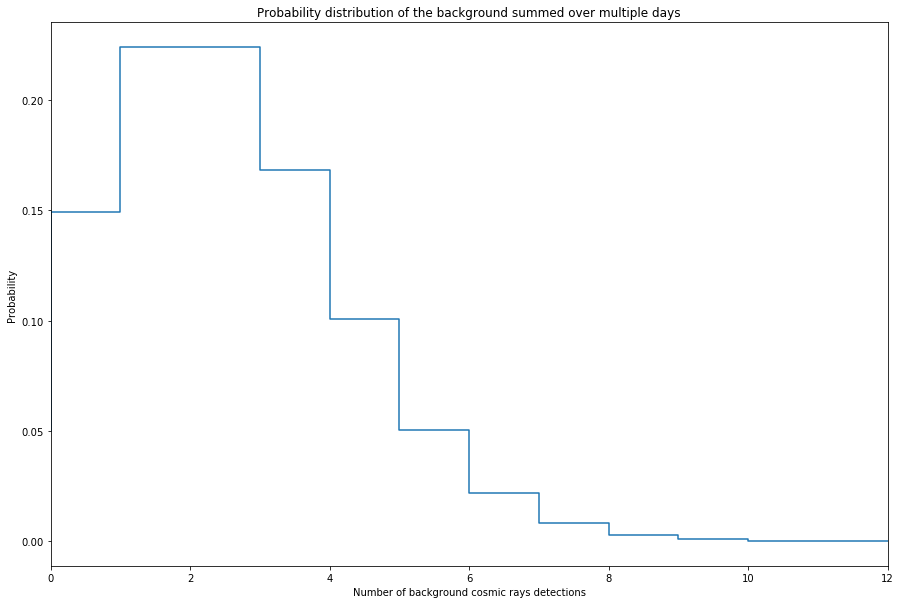

In [34]:
#lets set up a Poisson distribution

#x = np.arange(stats.poisson.pmf(0.01, mu),stats.poisson.ppf(0.99, mu))
mu = 3
x=list(range(120))
Background = scipy.stats.poisson.pmf(x,mu)
plt.xlim([0,12])
plt.ylabel('Probability')
plt.xlabel('Number of background cosmic rays detections')
plt.title('Probability distribution of the background summed over multiple days')
plt.matplotlib.pyplot.step(x,Background)
plt.show()

In [35]:
def multiconvolve (x,n):
    Backgound=x
    
    if n <= 1:
        return (signal)
   
    con = signal.convolve(Backgound,Backgound) 
    for i in range(0, n-2):
        con = signal.convolve(con,Backgound) 
        i+=1
    con = np.append(con,[0]*(n-1))    
    return(con)

Now let us look at how this background vary over days of observations, we expect it to spread out and become more Gaussian looking, as we can see below

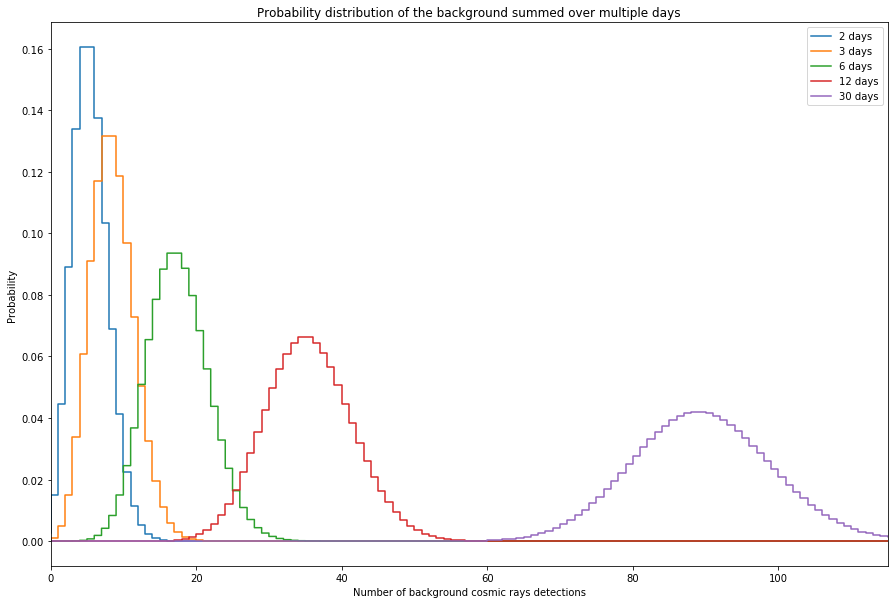

In [36]:
twoDays = multiconvolve(Background,2)
threeDays = multiconvolve(Background,3)
sixDays =  multiconvolve(Background,6)
twelveDays =  multiconvolve(Background,12)
thirtyDays =  multiconvolve(Background,30)
plt.matplotlib.pyplot.step((list(range(len(twoDays)))),twoDays, label ='2 days')
plt.matplotlib.pyplot.step((list(range(len(threeDays)))),threeDays, label = '3 days')
plt.matplotlib.pyplot.step((list(range(len(sixDays)))),sixDays, label = '6 days')
plt.matplotlib.pyplot.step((list(range(len(twelveDays)))),twelveDays, label = "12 days")
plt.matplotlib.pyplot.step((list(range(len(thirtyDays)))),thirtyDays,label= "30 days")
plt.xlim([0,115])
plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.show()

B)
Bellow we have the graph of the background summed over 5 days. It looks Gaussian until you see it on a log scale where it is evident that the tail is skewed and not Gaussian. One other obvious reasons for it to not be Gaussian yet is that it is still very much discreet, as we sum over more days the step size will get smaller until it approaches a continuous curve but at 5 days we are not there yet. There is also the issuer of the hard cut of at 0 the Poisson does not allow for negative values, put we do have a probability of having 0 events, this makes the jump at 0 quite big. As seen on the log graph bellow it cuts of the graph and the graph is not symmetric due to this jump.


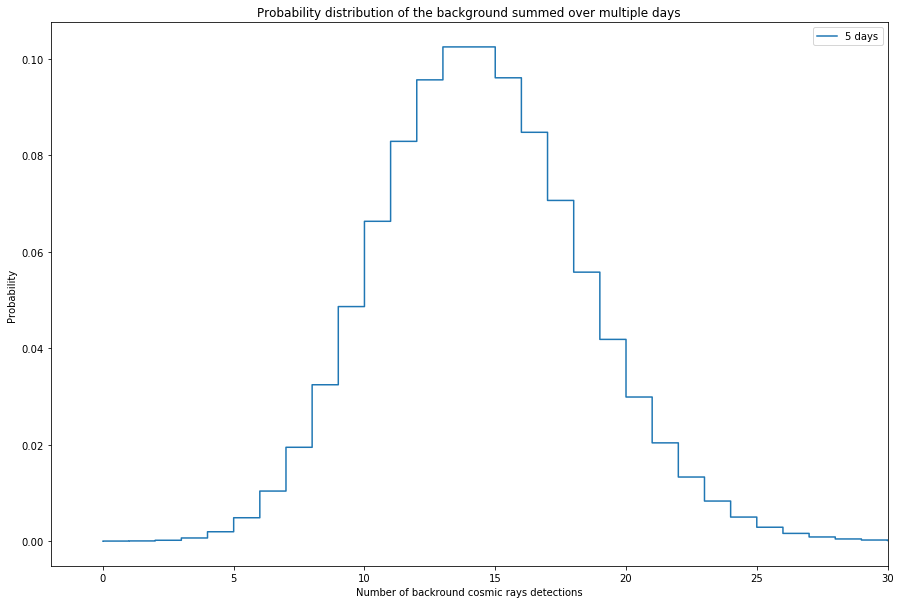

In [37]:
fiveDays =  multiconvolve(Background,5)
plt.matplotlib.pyplot.step((list(range(len(fiveDays)))),fiveDays, label ='5 days')
plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.xlim([-2,30])
plt.show()


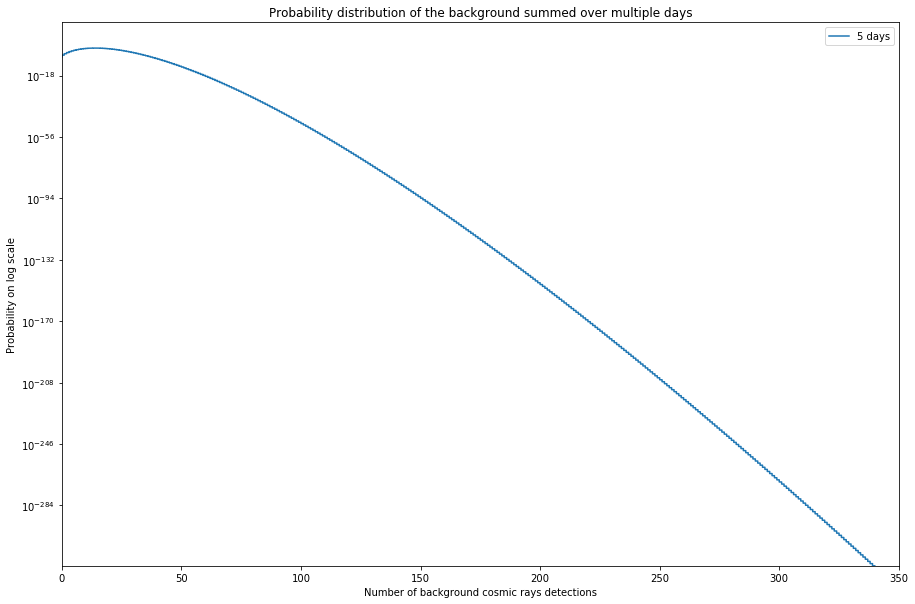

In [38]:
plt.matplotlib.pyplot.step((list(range(len(fiveDays)))),fiveDays, label ='5 days')
plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability on log scale')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([0,350])
plt.show()

C)
As we average days we can see how the distributions change bellow, of interests is the semi log plot when comparing to a Gaussian. We still have the same cut off we got back in part B until we are averaging 300 days or so, at that point the distribution is still right skewed in the tails but starts becoming symmetric around 1000 days. We see the graphs become more and more Gaussian which make sense since any dist averaged multiple times will approach Gaussian due to the central limit theorem

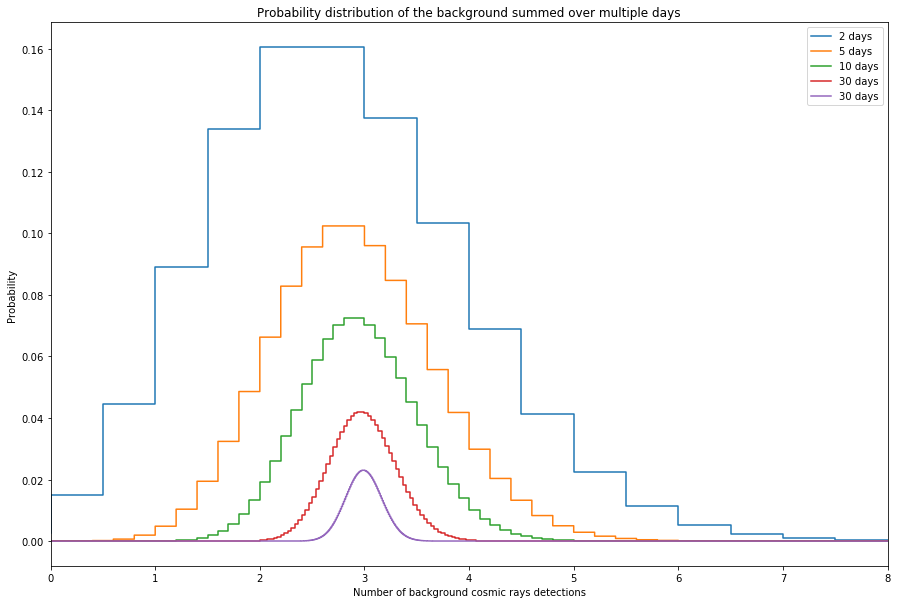

In [39]:
mu = 3
#x=list(range(12))
x = np.array(list(range(120)))
Background = scipy.stats.poisson.pmf(x,mu)
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
hundodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(hundodaysAve[0],hundodaysAve[1], label ='30 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.xlim([0,8])
plt.show()


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


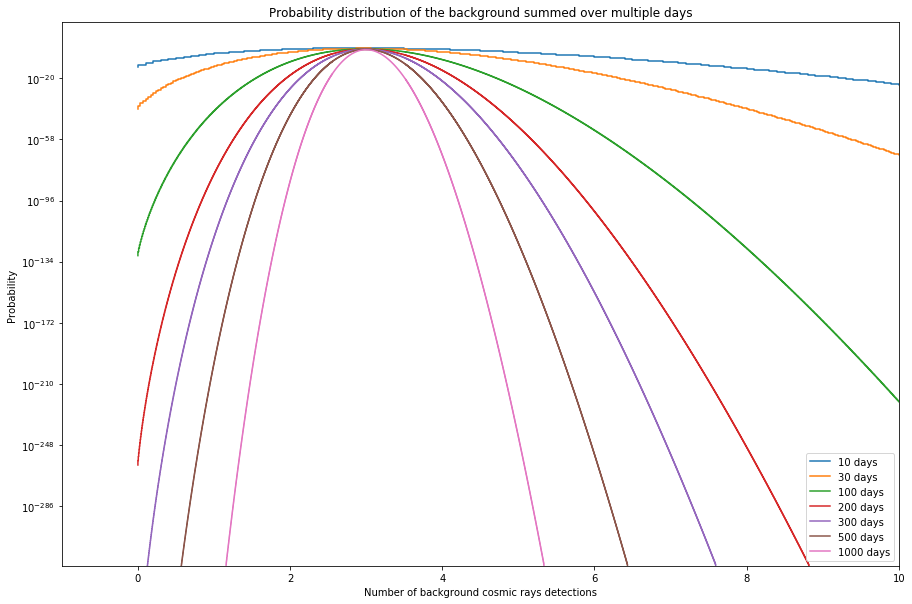

In [40]:

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
hundodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(hundodaysAve[0],hundodaysAve[1], label ='100 days')

n=200
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='200 days')

n=300
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='300 days')

n=500
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='500 days')

n=1000
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='1000 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([-1,10])
plt.show()



D) 
Lets say after two days of observations we want to know what is the sigma associated with the probability of seeing 20 or more events in two days due to the background distribution.

In [41]:
twoDaycmf = scipy.integrate.cumtrapz(twodaysAve[1])
P = twoDaycmf[20]
print('We get a simga of {0:1.3f}'.format(stats.norm.ppf(P)))

We get a simga of 3.026


2.
Let us say we have a background distribution of a Rayleigh that has scale of 10 per day.

A)
Let us look at how a skewed distribution such as the Rayleigh change as we average over multiple days 


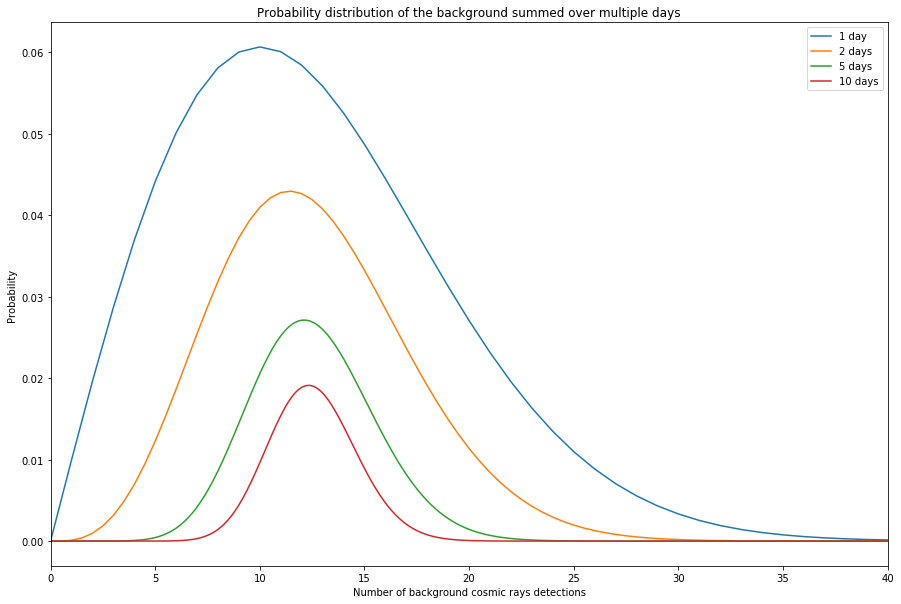

In [42]:
x = list(range(200))
Background = scipy.stats.rayleigh.pdf(x,scale = 10)
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

#n=30
#thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
#plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.xlim([0,40])
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


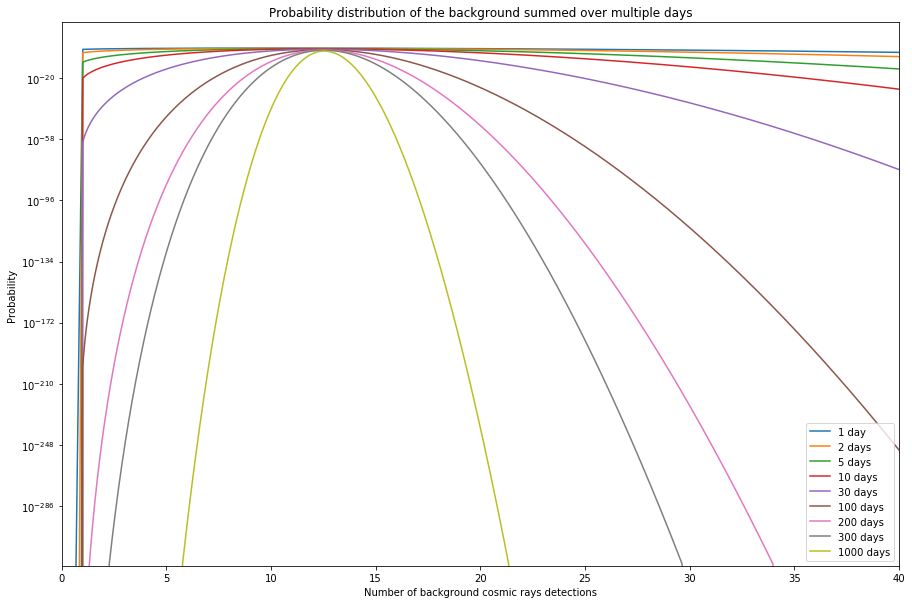

In [43]:
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='100 days')

n=200
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='200 days')

n=300
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='300 days')

n=1000
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='1000 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([0,40])
plt.show()

B)
As we average over more days the shape of our distribution becomes more symmetric and narrower, by looking at the semi log graph we can see how it approaches a Gaussian, it stops having a hard cut off at 0 for an average of 100 days and starts to really lose the asymmetry at 1000 days.

3.
A)
Let us say we have a background Gaussian distribution with width of 3, and find a measurement of value 12.112 we what to know the probability of the background producing a signal of 12.112 or stronger. We will do that below

In [44]:
x = np.array(list(range(-100000,100000,)))
x = x*0.01
Backgound = scipy.stats.norm.pdf(x, loc=0, scale=3)
cdf = scipy.integrate.cumtrapz(Backgound)
p = scipy.stats.norm.cdf(12.112, loc=0, scale=3)
p
print('We get a simga of {0:1.3f}'.format(stats.norm.ppf(p)))

We get a simga of 4.037


This does not have the 5 sigma standard and we cannot claim a discovery

B) We are now looking at a background 10k independent Gaussian distribution with a width of 3. So we are going to have a trial factor of 10k. In short we are 10K more likely to see every possible count of events then if only looking at one pixel, the plot of the distbuin is below.

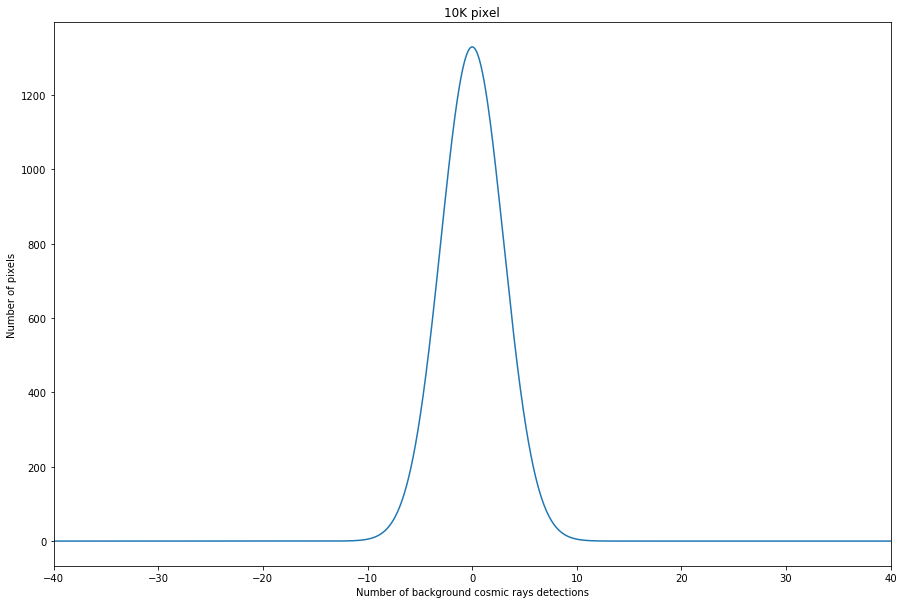

In [45]:
plt.plot(x,Backgound*10000)
plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Number of pixels')
plt.title('10K pixel')
#plt.legend()
#plt.yscale('log')
plt.xlim([-40,40])
plt.show()

C)


In [38]:
p = scipy.stats.norm.cdf(12.112, loc=0, scale=300)
p
print('We get a simga of {0:1.3f}'.format(stats.norm.ppf(p)))

We get a simga of 0.040


4.
A)


In [33]:
p = stats.norm.cdf(5)
print("{0:1.11f}".format(stats.norm.ppf(p,scale=3)))
stats.norm.ppf(p,scale=3)

14.99999999991


14.999999999910528

B)

In [106]:
p = stats.norm.cdf(5)
stats.norm.ppf(p,scale=300)

1499.9999999910528